# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Jawaban:
1. **Sumber Dataset**:  
Dataset diperoleh dari [New and Used Aircraft Pricing Data oleh artemkorottchenko](https://www.kaggle.com/datasets/artemkorottchenko/used-aircraft-pricing/data) yang telah disederhanakan/diedit sesuai kebutuhan.

2. **Ketentuan Dataset**:  
  - **Tanpa label**: ✅
  - **Jumlah baris**: 2530 ✅
  - **Tipe data**:
    - Kategorikal (Jenis Pesawat) ✅
    - Numerikal (Harga Pesawat dalam USD) ✅

3. **Pembatasan**:  
Dataset yang sudah digunakan dalam latihan clustering tidak digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka  library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [21]:
data = pd.read_csv('./data/plane-data.csv', header=None, names=['Harga', 'Kategori'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Harga     2530 non-null   int64 
 1   Kategori  2530 non-null   object
dtypes: int64(1), object(1)
memory usage: 39.7+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Jawaban

1. **Memahami Struktur Data**
   - Dataset yang telah saya edit memiliki 2 kolom dan 2530 baris  
   - Di kiri, ada kolom numerikal (harga pesawat dalam USD)
   - Di kanan, ada kolom kategorikal (jenis pesawat)

2. **Menangani Data yang Hilang**  
   - Tidak terdapat data yang hilang pada dataset.

3. **Analisis Distribusi dan Korelasi**  
Analisis distribusi data dideskripsikan sekilas melalui fungsi `describe()` di mana data pesawat terdistribusi ke dalam 12 kategori yang berbeda. Data awal berdasarkan fungsi tersebut memberitahu bahwa `mean` dan `std` (deviasi) yang lumayan tinggi. Sehingga, standarisasi perlu dilakukan. Saya menggunakan `StandardScaler()` untuk itu.

4. **Visualisasi Data**  
Saya menggunakan `LabelEncoder()` untuk encoding data kategorikal agar bisa dianalisis. Untuk algoritma utama machine learning menggunakan `OneHotEncoder()`. Teruntuk visualisasi data saya menggunakan berbagai jenis (histogram, boxplot, heatmap, dan juga pairplot) untuk meninjau korelasi. 


   Saya membuat segala fungsi visualisasi data dalam sebuah `class` agar terlihat lebih rapi (lebih suka programming modular).

   Untuk melihat output setiap plot, bisa dijalankan kode di bawah. Setiap plot memiliki cell terpisah.

In [22]:
class DataAnalysis:
    def __init__(self, data:pd.DataFrame): # Hanya bisa di Python 3.9 ke atas, kalau eror, hapus type hinting
        """
        Tidak perlu bikin pd.read_csv lagi
        Self-explanatory class
        """
        self.data = data.copy() # Copy agar tidak merubah data asli yang akan kena OneHotEncoder
        self.data['Kategori'] = LabelEncoder().fit_transform(self.data['Kategori']) # Untuk analisis aja
        sns.set_theme(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid') # Setting seaborn

    def describe_data(self):
        """Mendeskripsikan data secara sekilas, meliputi mean, std, min, max, dan quartile"""
        print(self.data.describe(), '\n')

    def plot_histogram(self):
        """Menampilkan data histogram"""
        self.data.hist(bins=30, figsize=(15, 10)) # Kategori dan Harga dipisah
        plt.show()

        plt.figure(figsize=(10, 6)) # Kategori dan Harga digabungkan
        sns.histplot(data=self.data, x="Kategori", y="Harga", bins=30, cbar=True)
        plt.show()

    def plot_boxplot(self):
        """Menampilkan data boxplot"""
        sns.boxplot(data=self.data, x="Kategori", y="Harga")
        plt.show()

    def plot_heatmap(self):
        """
        Menampilkan data korelasi antar kolom
        Unsurprisingly, Kategori dan Harga tidak berkorelasi
        """
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.show()

    def plot_pairplot(self):
        """Menampilkan data pairplot"""
        sns.pairplot(self.data)
        plt.show()

# Inisialisasi class ke variabel
data_analysis = DataAnalysis(data)

# Analisis dan Visualisasi Data

### 1. Brief Description

In [23]:
data_analysis.describe_data()

              Harga     Kategori
count  2.530000e+03  2530.000000
mean   7.013175e+05     6.578261
std    1.536440e+06     1.876474
min    3.500000e+03     0.000000
25%    9.492475e+04     6.000000
50%    2.100000e+05     7.000000
75%    5.837250e+05     7.000000
max    1.750000e+07    12.000000 



#### Highlights
- Harga
    - Mean (Rata-rata): Rata-rata harga adalah USD 701.317,5.
    - Standard Deviation (std): 1.536.440, variasi harga yang sangat tinggi.
    - Min (Minimum): Harga terendah adalah USD 3.500.
    - 25% (Kuartil ke-1): 25% harga berada di bawah USD 94.924,75.
    - 50% (Median): Setengah dari harga berada di bawah USD 210.000.
    - 75% (Kuartil ke-3): 75% harga berada di bawah USD 583.725.
    - Max (Maksimum): Harga tertinggi adalah USD 17.500.000.


- Kategori
    - Mean (Rata-rata): Rata-rata kategori adalah 6,58.
    - Standard Deviation (std): 1,88, penyebaran nilai kategori yang sedang.
    - Min (Minimum): Kategori terendah adalah 0.
    - 25% (Kuartil ke-1): 25% kategori berada di bawah 6.
    - 50% (Median): Setengah dari kategori bernilai 7 atau kurang.
    - 75% (Kuartil ke-3): 75% kategori bernilai 7 atau kurang.
    - Max (Maksimum): Kategori tertinggi adalah 12.

### 2. Histogram

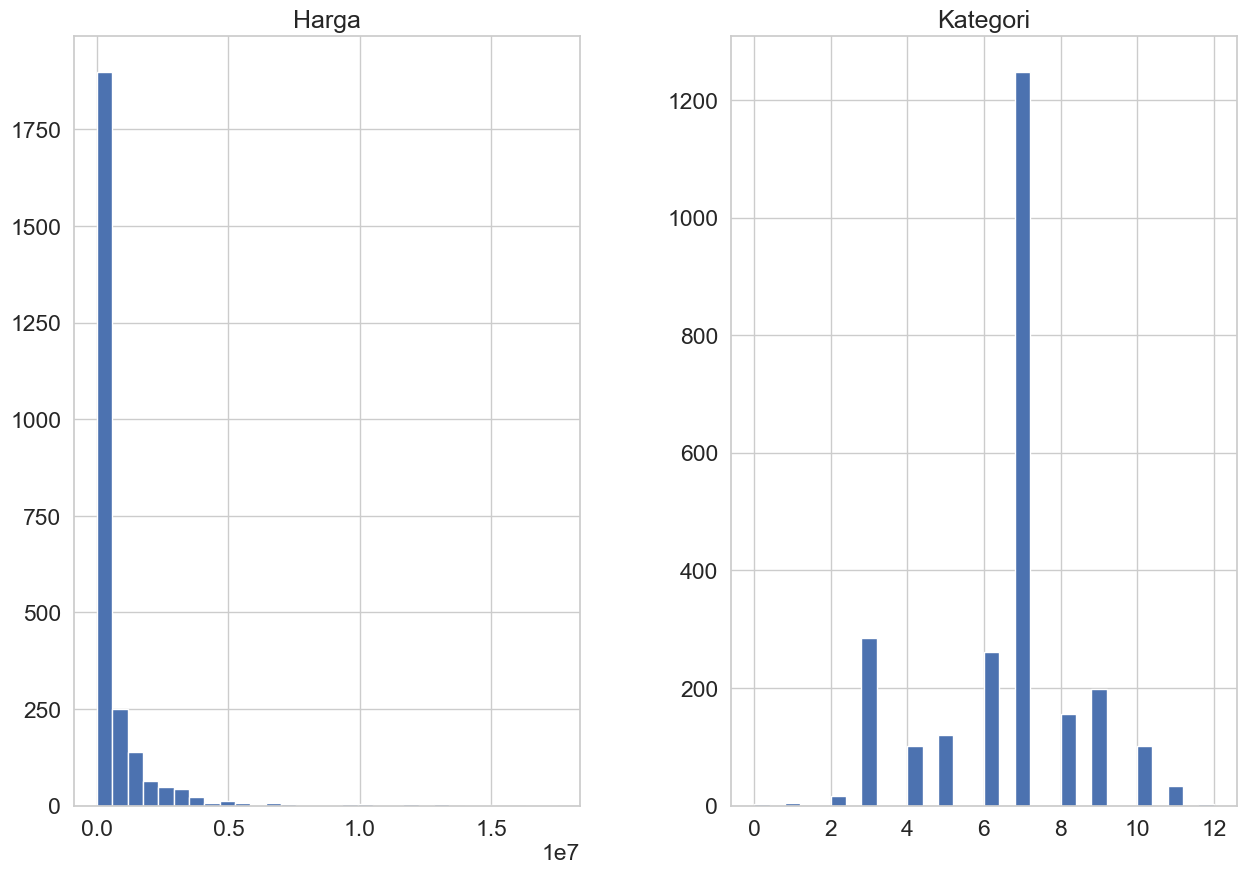

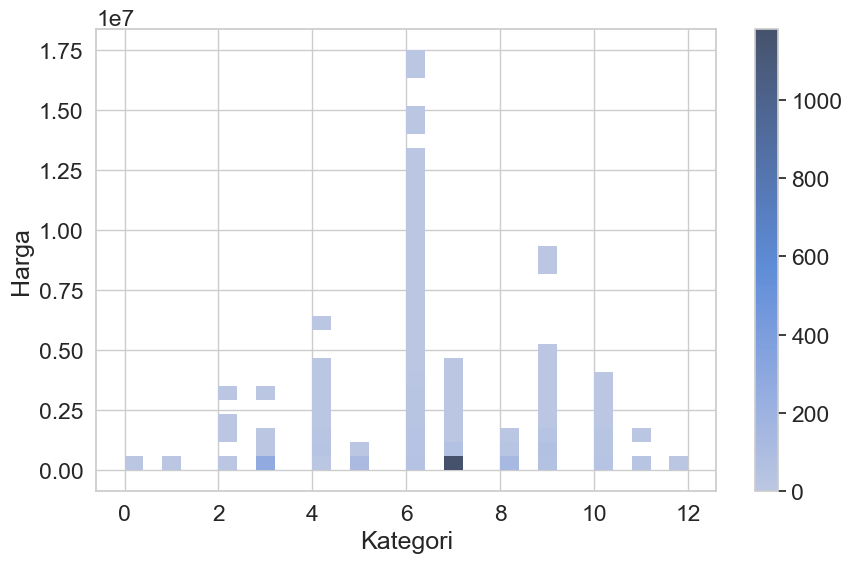

In [24]:
data_analysis.plot_histogram()

#### Highlights

- Harga sebagian besar terkonsentrasi di kisaran rendah untuk kategori tertentu (terutama kategori 6).
- Distribusi harga sangat tidak merata, dengan outlier harga tinggi.
- Ada beberapa kategori lain yang memiliki data, namun distribusinya lebih kecil dibandingkan kategori dominan (kategori 6)

### 3. Boxplot

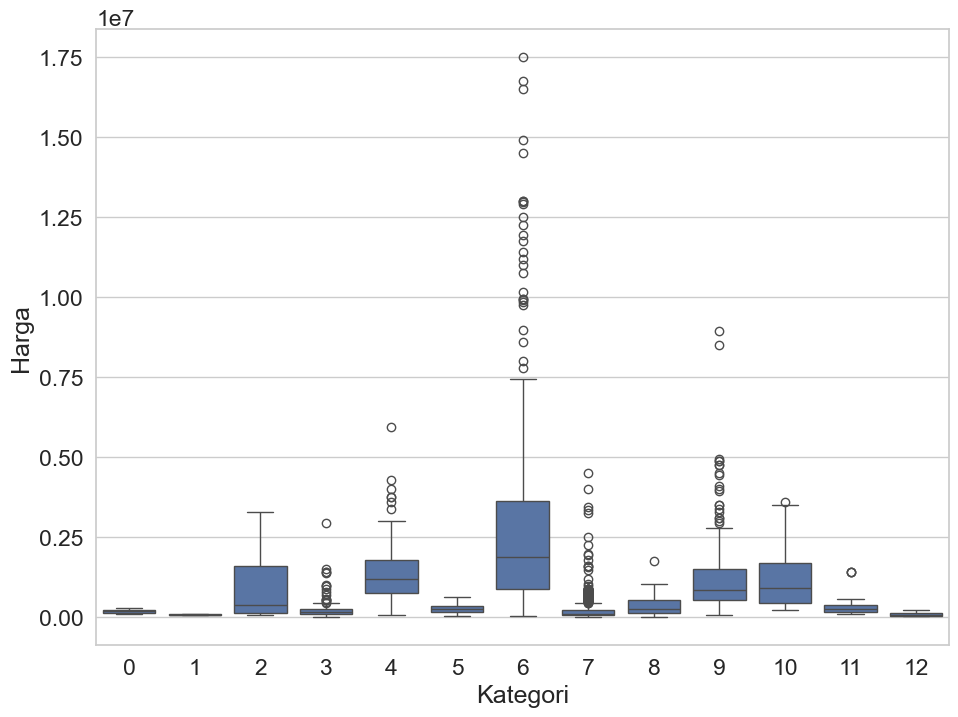

In [25]:
data_analysis.plot_boxplot()

#### Highlights

- Kategori 6 dan 7:
    - Kategori ini memiliki harga yang jauh lebih tinggi dan bervariasi dibanding kategori lainnya.
    - Banyak outlier yang menunjukkan harga sangat tinggi (di atas USD 1 juta hingga USD 17 juta).
- Kategori Lain (0–5, 8–12):
    - Harga rata-rata lebih rendah dibanding kategori 6 dan 7.
    - Variasi harga pada kategori ini relatif kecil, dan terdapat beberapa outlier di kategori tertentu.
- Kategori dengan Outlier Terbanyak:
    - Kategori 6 memiliki outlier terbanyak dengan harga yang sangat tinggi.
- Kategori Stabil (9–12):
    - Variasi harga lebih kecil, dan median berada di rentang rendah.

### 4. Heatmap

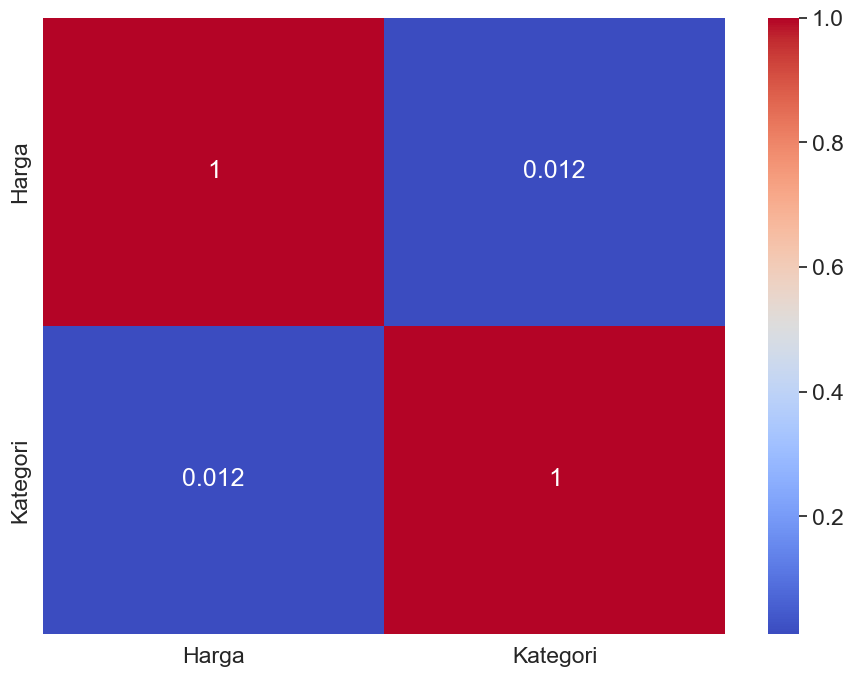

In [26]:
data_analysis.plot_heatmap()

#### Highlights

- Korelasi antara Harga dan Kategori: 
    - Nilai korelasi 0.012 menunjukkan hubungan yang sangat lemah. Artinya, perubahan dalam kategori hampir tidak memengaruhi harga atau tidak signifikan.
- Warna dominan: 
    - Warna biru pada Harga vs Kategori dan menunjukkan bahwa hubungan antarvariabel sangat kecil.

### 5. Pairplot

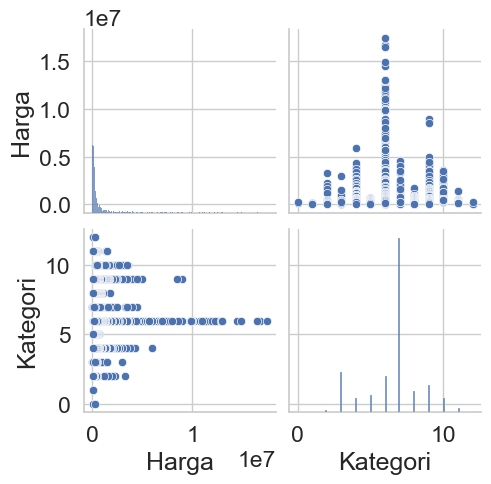

In [27]:
data_analysis.plot_pairplot()

#### Highlights

Data harga menunjukkan distribusi yang sangat miring, dengan mayoritas data di bawah nilai tertentu, menunjukkan beberapa produk yang jauh lebih mahal dibandingkan mayoritas. Tidak terlihat hubungan linear yang jelas antara Harga dan Kategori.

### Kesimpulan Analisis dan Visualisasi Data
1. Harga pesawat tidak terlalu berhubungan dengan jenis pesawatnya. Tidak ada pola linear atau keterkaitan yang jelas antara jenis pesawat (Kategori) dan harga.
2. Penyebaran harga tidak merata karena ada banyak sekali pesawat yang memiliki harga murah dan lumayan sedikit harga tinggi yang menjadikan mereka outlier.
3. Data masih dapat digunakan untuk membagi pesawat ke dalam kelompok "terjangkau" atau "tidak terjangkau." Relevan untuk analisis segmentasi pasar atau analisis konsumen.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [28]:
# Bagian preprocessing data
data.columns = data.columns.astype(str)
features = data[['Harga', 'Kategori']]

# Gabung data numerikal dan kategorikal
# Kerjanya dengan mengencode kategori kemudian digabungkan dengan harga melalui concat
encoder = OneHotEncoder()
encoded_categories = encoder.fit_transform(features[['Kategori']]).toarray()
encoded_categories_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['Kategori']))
combined_features = pd.concat([features[['Harga']], pd.DataFrame(encoded_categories_df)], axis=1)

# Standarisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(combined_features)

# Aplikasikan PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [29]:
lowest_score = -1
best_k = 2
best_kmeans = None

# K-Means Clustering max 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(pca_features)
    score_kmeans = silhouette_score(pca_features, labels_kmeans) # Langsung hitung score karena if statement di bawahnya
    if score_kmeans > lowest_score:
        best_k = k
        best_kmeans = kmeans

# DBSCAN biar ada pembanding
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(pca_features)
score_dbscan = silhouette_score(pca_features, labels_dbscan)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [30]:
# Silhouette scoring K-Means ada di snippet sebelumnya
print(f"Silhouette Score K-Means: {score_kmeans}")

distortion = best_kmeans.inertia_
print(f"Distorsi K-Means: {distortion}")

score_dbscan = silhouette_score(pca_features, labels_dbscan)
print(f"Silhouette Score DBSCAN: {score_dbscan}")

Silhouette Score K-Means: 0.8134481412168963
Distorsi K-Means: 101.46249217348358
Silhouette Score DBSCAN: 0.7881389820420254


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
# Opsional, saya tidak melakukan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

## Jawaban:
Saya menggunakan 2D PCA projection untuk kedua model.

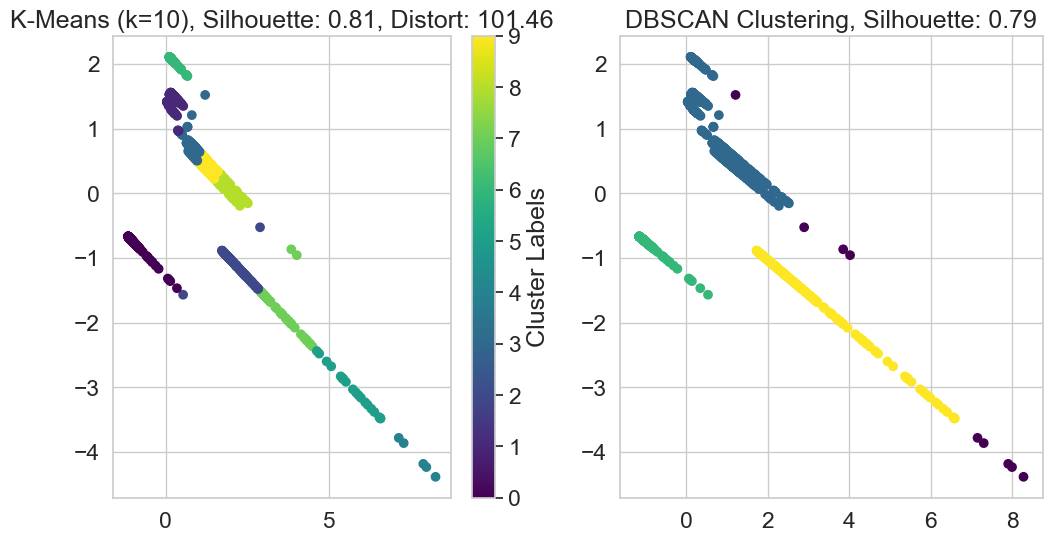

In [32]:
# Visualisasi hasil prep
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# K-Means plot
scatter_kmeans = ax1.scatter(pca_features[:, 0], pca_features[:, 1], c=best_kmeans.labels_, cmap='viridis')
ax1.set_title(f'K-Means (k={best_k}), Silhouette: {score_kmeans:.2f}, Distort: {best_kmeans.inertia_:.2f}')
fig.colorbar(scatter_kmeans, ax=ax1, label='Cluster Labels')

# DBSCAN plot
ax2.scatter(pca_features[:, 0], pca_features[:, 1], c=dbscan.labels_, cmap='viridis')
ax2.set_title(f'DBSCAN Clustering, Silhouette: {score_dbscan:.2f}')

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [33]:
"""
Mapping biar interpretasi lebih gampang
dibaca dari kiri (cluster) ke kanan (details)
"""

# Mencari label paling dominan di setiap cluster
true_labels = data['Kategori']
mapping_label = pd.crosstab(best_kmeans.labels_, true_labels)

# Untuk yang berdasarkan harga
cluster_stats = data.groupby(best_kmeans.labels_).agg({
    'Harga': ['max', 'min', 'mean']
})

### 1. Label Dominan per Cluster

In [34]:
cluster_to_label = mapping_label.idxmax(axis=1)
print("Mapping cluster ke label:", cluster_to_label, '\n')

Mapping cluster ke label: row_0
0    Single Engine Piston
1           Single Piston
2            Private Jets
3     Turbine Helicopters
4            Private Jets
5            Private Jets
6     Multi Engine Piston
7            Private Jets
8     Turbine Helicopters
9     Turbine Helicopters
dtype: object 



### 2. Harga Tertinggi di Setiap Cluster

In [35]:
cluster_highest = cluster_stats['Harga']['max']
print("Mapping nilai tiap cluster HIGH:\n", cluster_highest, '\n')

Mapping nilai tiap cluster HIGH:
 0     3995000
1     1049000
2     5950000
3     2950000
4    17500000
5    13000000
6     1500000
7     8950000
8     4950000
9     3300000
Name: max, dtype: int64 



### 3. Harga Terendah di Setiap Cluster

In [36]:
cluster_lowest = cluster_stats['Harga']['min']
print("Mapping nilai tiap cluster LOW:\n", cluster_lowest, '\n')

Mapping nilai tiap cluster LOW:
 0        3500
1       18900
2       40000
3       65000
4    14495000
5     7800000
6        9000
7     3095000
8     2450000
9      879000
Name: min, dtype: int64 



### 4. Harga Rata-rata di Setiap Cluster
Terdapat notasi eksponen, di mana untuk menentukan nilainya tinggal mengalikan nilai average harga dengan 10 pangkat e

Contoh: 3,14159e+05 = 3,14159 * 10^5 = 314.159

In [37]:
cluster_avg = cluster_stats['Harga']['mean']
print("Mapping nilai tiap cluster AVG:\n", cluster_avg, '\n')

Mapping nilai tiap cluster AVG:
 0    1.930857e+05
1    2.912870e+05
2    1.372287e+06
3    6.230235e+05
4    1.602900e+07
5    1.080068e+07
6    2.226975e+05
7    4.911071e+06
8    3.401779e+06
9    1.584139e+06
Name: mean, dtype: float64 



Untuk dapat menginterpretasikan dan mengevaluasi hasil clustering dengan tepat maka saya menggunakan algoritma di atas sehingga saya dapat mengetahui:
1. Label dominan di setiap cluster
2. Range harga per cluster
3. Rata-rata harga pesawat dalam cluster

**a. K-Means**
1. Cluster 0: **"Cluster Pesawat Murah I"**
  - Mayoritas merupakan data berlabel **Single Engine Piston** yang memiliki range harga USD 3.500 hingga USD 3.995.000 dengan rata-rata USD 193.085,7
2. Cluster 1: **(Bagian dari "Cluster Pesawat Murah II")**
  - Mayoritas merupakan data berlabel **Single Piston** yang memiliki range harga USD 18.900 hingga USD 1.049.000 dengan rata-rata USD 291.287,0
3. Cluster 2, 4, 5, 7: **"Cluster Pesawat Moderate-Mahal"**
  - Mayoritas merupakan data berlabel **Private Jets** yang memiliki range harga:
    1. Cluster 2: USD 40.000 hingga USD 5.950.000 dengan rata-rata USD 1.372.287,0
    2. Cluster 4: USD 14.495.000 hingga USD 17.500.000 dengan rata-rata USD 16.029.000,0
    3. Cluster 5: USD 7.800.000 hingga USD 13.000.000 dengan rata-rata USD 10.800.680,0
    4. Cluster 7: USD 3.095.000 hingga USD 8.950.000 dengan rata-rata USD 4.911.071,0
4. Cluster 3, 8, 9: **"Cluster Pesawat Murah II"**
  - Mayoritas merupakan data berlabel **Turbine Helicopters** yang memiliki range harga:
    1. Cluster 3: USD 65.000 hingga USD 2.950.000 dengan rata-rata USD 623.023,5
    2. Cluster 8: USD 2.450.000 hingga USD 4.950.000 dengan rata-rata USD 3.401.779,0
    3. Cluster 9: USD 879.000 hingga USD 3.300.000 dengan rata-rata USD 1.584.139,0
5. Cluster 6: **(Bagian dari "Cluster Pesawat Murah II")**
  - Mayoritas merupakan data berlabel **Multi Engine Piston** yang memiliki range harga USD 9.000 hingga USD 1.500.000 dengan rata-rata USD 222.697,5

  **Kesimpulan:**
  - Cluster Pesawat Murah: Harga rata-rata rendah dengan range harga yang lebih sempit.
  - Cluster Pesawat Moderate-Mahal: Harga rata-rata lebih tinggi dengan range harga yang lebih luas, terutama pada cluster dengan data dari **Private Jets**.

**b. DBSCAN**
1. Cluster Ungu (Noise):
  - Kumpulan berbagai titik cluster yang terletak berjauhan dari yang lain (melebihi epsilon), dianggap sebagai outlier.
2. Cluster Hijau:
  - Setara dengan **"Cluster Pesawat Murah I"** pada clustering K-Means.
3. Cluster Biru:
  - Setara dengan **"Cluster Pesawat Murah II"** pada clustering K-Means.
4. Cluster Kuning:
  - Setara dengan **"Cluster Pesawat Moderate-Mahal"** pada clustering K-Means.

  **Kesimpulan:**
  - Hasil clustering DBSCAN menunjukkan kecocokan dengan hasil K-Means, meskipun berbasis kepadatan  dan mengabaikan titik yang tersebar jauh dari kelompok utama.

**Overall:**
- Hasil dari kedua clustering ini dapat bermanfaat dalam menentukan jenis-jenis pesawat yang cocok dengan beragam jenis budget.
- Terutama untuk para selebriti, pilot, atau orang-orang yang mengutamakan privasi dengan menggunakan pesawat pribadi, dan mungkin juga beberapa yang "sultan" hehe.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
# Save untuk dipakai ke Classification
data['Cluster'] = best_kmeans.labels_
data.to_csv('./data/result.csv', index=False)